In [1]:
!unzip /content/drive/MyDrive/Machine-Learning/Kaggle-Tutorial/cv-course-model.zip
!unzip /content/drive/MyDrive/Machine-Learning/Kaggle-Tutorial/car-or-truck.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: valid/Car/05205.jpeg    
  inflating: valid/Car/05206.jpeg    
  inflating: valid/Car/05208.jpeg    
  inflating: valid/Car/05213.jpeg    
  inflating: valid/Car/05214.jpeg    
  inflating: valid/Car/05217.jpeg    
  inflating: valid/Car/05218.jpeg    
  inflating: valid/Car/05219.jpeg    
  inflating: valid/Car/05221.jpeg    
  inflating: valid/Car/05222.jpeg    
  inflating: valid/Car/05225.jpeg    
  inflating: valid/Car/05226.jpeg    
  inflating: valid/Car/05227.jpeg    
  inflating: valid/Car/05228.jpeg    
  inflating: valid/Car/05234.jpeg    
  inflating: valid/Car/05236.jpeg    
  inflating: valid/Car/05238.jpeg    
  inflating: valid/Car/05239.jpeg    
  inflating: valid/Car/05241.jpeg    
  inflating: valid/Car/05242.jpeg    
  inflating: valid/Car/05245.jpeg    
  inflating: valid/Car/05248.jpeg    
  inflating: valid/Car/05249.jpeg    
  inflating: valid/Car/05250.jpeg    
  inflatin

# 1. The Convolutional Classifier
- 2 parts: convolutional base and dense head
- Base: extract the features
- Head: determine the class
## Training the Classifier
- often, reuse the base of pretrained model
- then attach an untrained head (transfer learning)

Example - Train a Convnet Classifier
- is a picture of a car or truck

In [2]:
# Step 1: Load Data
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Reproducability
def set_seed(seed=31415):
  np.random.seed(seed)
  tf.random.set_seed(seed)
  os.environ['PYTHONHASHSEED'] = str(seed)
  os.environ['TF_DETERMINISTIC_OPS'] ='1'
set_seed(31415)

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells

In [3]:
# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    'train',
    labels='inferred',
    label_mode='binary',
    image_size=[128,128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,)
ds_valid_ = image_dataset_from_directory(
    'valid',
    labels='inferred',
    label_mode='binary',
     image_size=[128,128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

#Data Pipeline
def convert_to_float(image, label):
  image=tf.image.convert_image_dtype(image, dtype=tf.float32)
  return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

ds_valid=(
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


In [ ]:
# Step 2: Define Pretrained Base
pretrained_base = tf.keras.models.load_model(
    'cv-course-models/vgg16-pretrained-base'
)
pretrained_base.trainable = False

In [ ]:
#Step 3: Attach Head
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    pretrained_base,
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [ ]:
#Step 4: Train
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history= model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30,
    verbose=0,
)

In [ ]:
import pandas as pd
history_frame=pd.DataFrame(history.history)
history_frame.loc[:, ['loss','val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();

# 2. Convolution and ReLU
## Feature Extraction
- three basic operations
  - Filter an image for a particular feature (convolution)
  - Detect that featuer within the filtered image (ReLU)
  - Condense the image to enhance the features (maximum pooling)

## Filter with Convolution


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3), #activation is None
])

  ## Weights
- the weights contained in convolutional layers - **kernels**
- a kernel operates by scanning image and produce a weighted sum of pixel values

## Activations
- we call **feature maps**
- result when apply a filter to an image

# Detect with ReLU


In [ ]:
model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
])

- ReLU function is nonlinear


In [ ]:
!unzip /content/drive/MyDrive/Machine-Learning/Kaggle-Tutorial/computer-vision-resources.zip

Archive:  /content/drive/MyDrive/Machine-Learning/Kaggle-Tutorial/computer-vision-resources.zip
  inflating: car_1.jpg               
  inflating: car_feature.jpg         
  inflating: car_illus.jpg           
  inflating: circle_feature_center.png  
  inflating: circle_feature_ul.png   
  inflating: goose.png               
  inflating: jw.jpg                  
  inflating: k.jpg                   
  inflating: k.png                   
  inflating: kernel_down.jpg         
  inflating: kerneler.png            
  inflating: ma.jpg                  
  inflating: machinelearning.csv     
  inflating: maxpool.png             
  inflating: maxpool2.png            
  inflating: rl.jpg                  
  inflating: tensorflow_datasets-3.2.1-py3-none-any.whl  
  inflating: ys.jpg                  


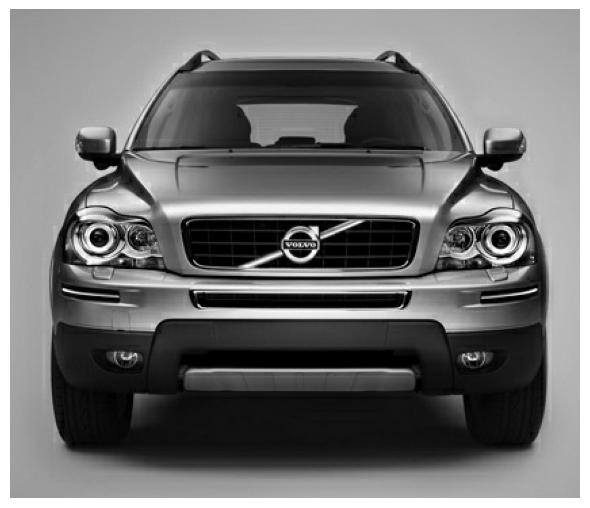

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

image_path = 'car_feature.jpg'
image = tf.io.read_file(image_path)
image = tf.io.decode_jpeg(image)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.show();

In [ ]:
import tensorflow as tf

kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
])

plt.figure(figsize=(3, 3))
show_kernel(kernel)

NameError: ignored

<Figure size 300x300 with 0 Axes>

In [ ]:
# Reformat for batch compatibility.
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)


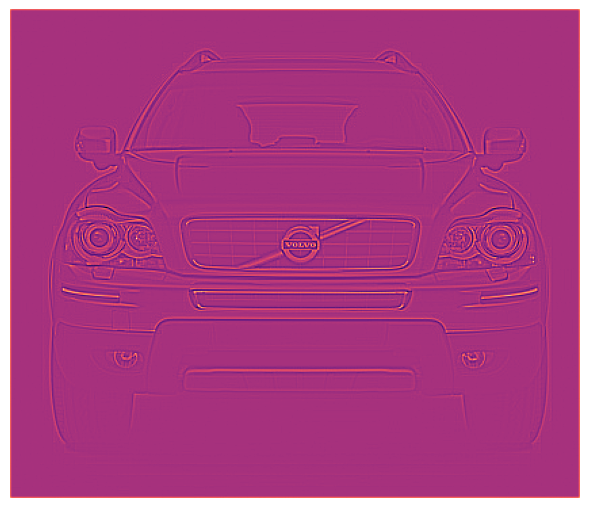

In [ ]:
image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME',
)

plt.figure(figsize=(6,6))
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.show();

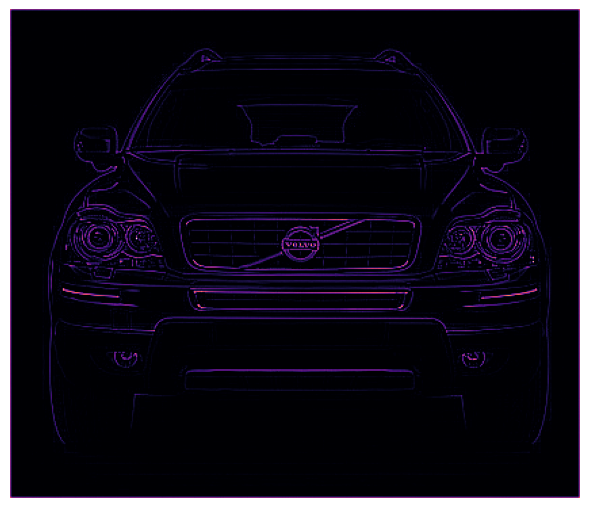

In [ ]:
image_detect = tf.nn.relu(image_filter)

plt.figure(figsize=(6,6))
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.show();

# 3. Maximum Pooling
## Condense with Maximum Pooling

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3),
    layers.MaxPool2D(pool_size=2),
])

- MaxPool2D layer with pool_size same as kernel_size; not have trainable weights
-> condense step

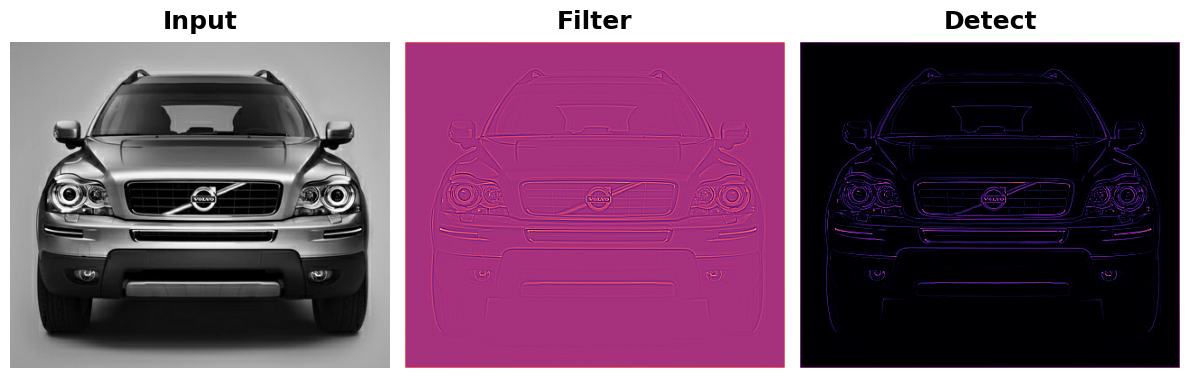

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis('off')
plt.title('Input')
plt.subplot(132)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Filter')
plt.subplot(133)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Detect')
plt.show();

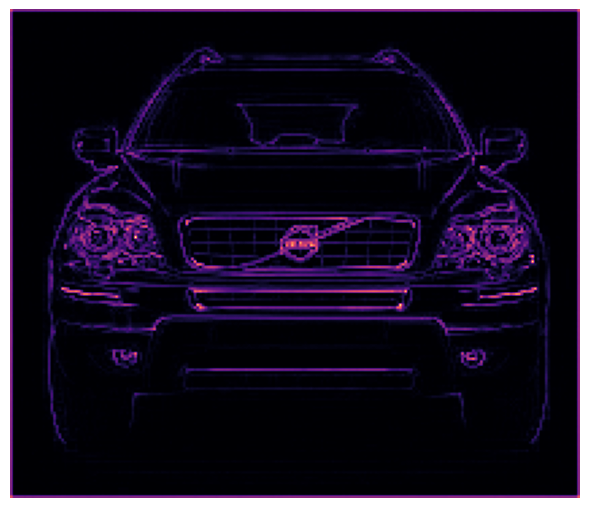

In [ ]:
import tensorflow as tf

image_condense = tf.nn.pool(
    input=image_detect, # image in Detect step
    window_shape=(2,2),
    pooling_type='MAX',
    strides=(2,2),
    padding='SAME',
)

plt.figure(figsize=(6,6))
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.show();

## Transaltion Invariance
- a convnet with maximum pooling - not distinguish features by their location in the image
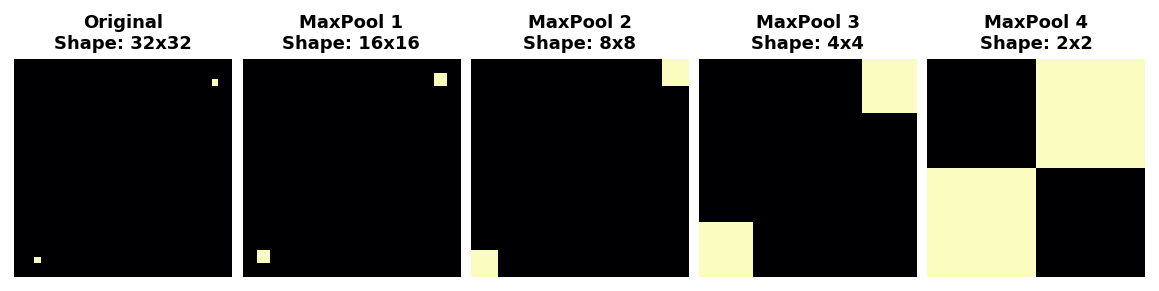

In [ ]:
import numpy as np
from itertools import product
from skimage import draw, transform

def circle(size, val=None, r_shrink=0):
    circle = np.zeros([size[0]+1, size[1]+1])
    rr, cc = draw.circle_perimeter(
        size[0]//2, size[1]//2,
        radius=size[0]//2 - r_shrink,
        shape=[size[0]+1, size[1]+1],
    )
    if val is None:
        circle[rr, cc] = np.random.uniform(size=circle.shape)[rr, cc]
    else:
        circle[rr, cc] = val
    circle = transform.resize(circle, size, order=0)
    return circle

def show_kernel(kernel, label=True, digits=None, text_size=28):
    # Format kernel
    kernel = np.array(kernel)
    if digits is not None:
        kernel = kernel.round(digits)

    # Plot kernel
    cmap = plt.get_cmap('Blues_r')
    plt.imshow(kernel, cmap=cmap)
    rows, cols = kernel.shape
    thresh = (kernel.max()+kernel.min())/2
    # Optionally, add value labels
    if label:
        for i, j in product(range(rows), range(cols)):
            val = kernel[i, j]
            color = cmap(0) if val > thresh else cmap(255)
            plt.text(j, i, val,
                     color=color, size=text_size,
                     horizontalalignment='center', verticalalignment='center')
    plt.xticks([])
    plt.yticks([])

def show_extraction(image,
                    kernel,
                    conv_stride=1,
                    conv_padding='valid',
                    activation='relu',
                    pool_size=2,
                    pool_stride=2,
                    pool_padding='same',
                    figsize=(10, 10),
                    subplot_shape=(2, 2),
                    ops=['Input', 'Filter', 'Detect', 'Condense'],
                    gamma=1.0):
    # Create Layers
    model = tf.keras.Sequential([
                    tf.keras.layers.Conv2D(
                        filters=1,
                        kernel_size=kernel.shape,
                        strides=conv_stride,
                        padding=conv_padding,
                        use_bias=False,
                        input_shape=image.shape,
                    ),
                    tf.keras.layers.Activation(activation),
                    tf.keras.layers.MaxPool2D(
                        pool_size=pool_size,
                        strides=pool_stride,
                        padding=pool_padding,
                    ),
                   ])

    layer_filter, layer_detect, layer_condense = model.layers
    kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
    layer_filter.set_weights([kernel])

    # Format for TF
    image = tf.expand_dims(image, axis=0)
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)

    # Extract Feature
    image_filter = layer_filter(image)
    image_detect = layer_detect(image_filter)
    image_condense = layer_condense(image_detect)

    images = {}
    if 'Input' in ops:
        images.update({'Input': (image, 1.0)})
    if 'Filter' in ops:
        images.update({'Filter': (image_filter, 1.0)})
    if 'Detect' in ops:
        images.update({'Detect': (image_detect, gamma)})
    if 'Condense' in ops:
        images.update({'Condense': (image_condense, gamma)})

    # Plot
    plt.figure(figsize=figsize)
    for i, title in enumerate(ops):
        image, gamma = images[title]
        plt.subplot(*subplot_shape, i+1)
        plt.imshow(tf.image.adjust_gamma(tf.squeeze(image), gamma))
        plt.axis('off')
        plt.title(title)

# 4. Sliding Window
- strides: how far the window should move at each step
- padding: how we handle the pixels at the edges of the input

In [ ]:
model = keras.Sequential([
    layers.Conv2D(filters=64,
                  kernel_size=3,
                  strides=1,
                  padding='same',
                  activation='relu'),
    layers.MaxPool2D(pool_size=2,
                     strides=1,
                     padding='same')
    # More layers follow
])

## Stride
- the distance the window move
- specify the stride in both dimensions of the image: one left-> right, one top->bottom
- often strides=(1,1). Increasing strides -> miss out potentially valuable info (skip some pixels)
- but Maximum pooling layers have strides > 1

## Padding
- 'same', 'valid'
- 'valid': window stay entirely inside the input -> output shrinks (lose pixels); limit number of layers
- 'same': pad the input with '0's around its borders, the output size = the input size

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

image = circle([64, 64], val=1.0, r_shrink=3)
image = tf.reshape(image, [*image.shape, 1])
# Bottom sobel
kernel = tf.constant(
    [[-1, -2, -1],
     [0, 0, 0],
     [1, 2, 1]],
)


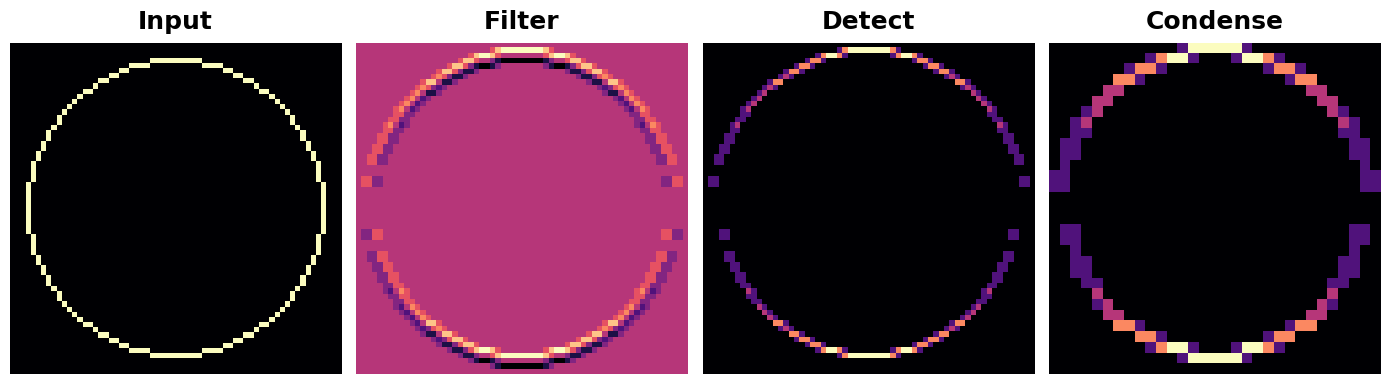

In [ ]:
show_extraction(
    image, kernel,

    # Window parameters
    conv_stride=1,
    pool_size=2,
    pool_stride=2,

    subplot_shape=(1,4),
    figsize=(14,6),
)

# 5. Custom Convnets
## Convolutional Blocks
- stacks of Conv2D and MaxPool2D
- each block - a round of extraction


In [5]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # First convolutional Block
    layers.Conv2D(filters=32, kernel_size=5, activation='relu', padding='same',
                  input_shape=[128,128,3]), # [height, width, color channels(RGB)]
    layers.MaxPool2D(),

    # Second Convolutional Block
    layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Third Convolutional Block
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),

    # Classifier Head
    layers.Flatten(),
    layers.Dense(units=6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 128)       0

In [8]:
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells


# Load training and validation sets
ds_train_ = image_dataset_from_directory('train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    'valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


In [9]:
# Step 3: Train
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [10]:
history= model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=40,
    verbose=0
)